In [1]:
import numpy as np
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
import MACD_Extraction, \
        Chart_Data_Extraction, \
        utils, \
        RSI_Extraction, \
        Momentum_Extraction, \
        Stochastik_Extraction,\
        MFI_Extraction, \
        TRIX_Extraction
from utils import ApiInformation, ThreadInformation
from scipy.signal import find_peaks,argrelmin
from threading import Thread, Lock

API_KEY = "&apikey=94VAKAGALC5KMWMV"
API_URL = "https://www.alphavantage.co/query?"

In [3]:
API_INFO = ApiInformation(API_KEY,API_URL)

In [4]:
ticker = 'AAPL'

storage = {
    'chart' : [], 
    'macd' : {'values' : {'values' : [], 'signals' : []}, 'signal' :{ 'oversold' : [], 'overbought' : []}}, 
    'rsi' : {'values' : [], 'oversold' : [], 'overbought' : []}, 
    'mom' : {'values' : [], 'oversold' : [], 'overbought' : []},
    'mfi' : {'values' : [], 'oversold' : [], 'overbought' : []},
    'stoch' : {'values' : {'slow' : [], 'fast' : []}, 'oversold' : [], 'overbought' : []}
}

thread_functions = [
                    Chart_Data_Extraction.single_thread_processing_chart,
                    MACD_Extraction.single_thread_processing_macd,
                    Momentum_Extraction.single_thread_processing_momentum,
                    RSI_Extraction.single_thread_processing_rsi,
                    Stochastik_Extraction.single_thread_processing_stochastik,
                    MFI_Extraction.single_thread_processing_mfi,
                   ]


storage_lock = Lock()

threads = []

#request charts
for i in range(len(thread_functions)):
    t = Thread(target=thread_functions[i], args=(ticker, storage, API_INFO, storage_lock))
    t.start()
    threads.append(t)
    
for c in threads:
    c.join()



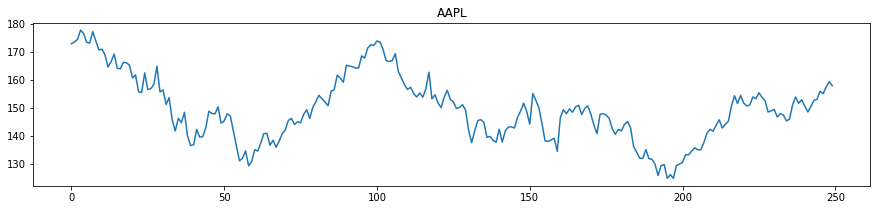

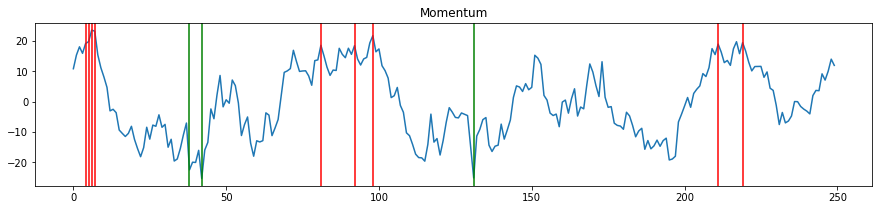

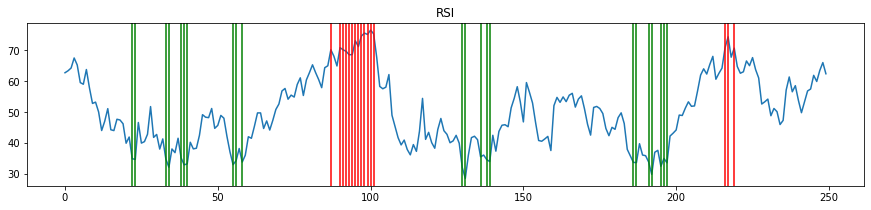

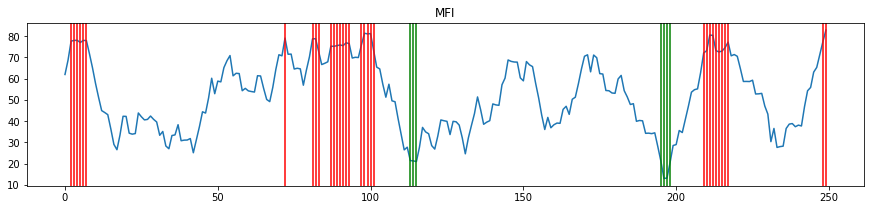

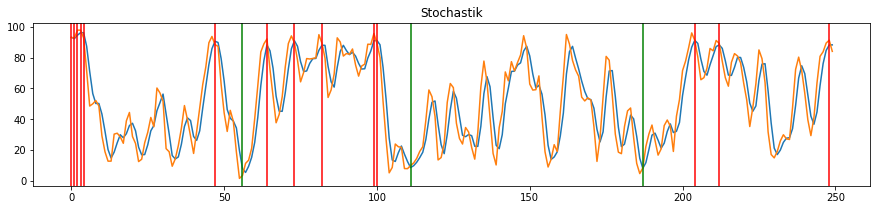

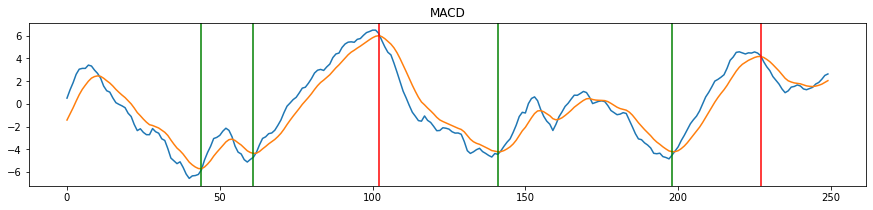

In [5]:
plt.rcParams["figure.figsize"] = (15,3)
plt.title(ticker)
plt.plot(storage['chart']);
plt.show()

utils.plotWithSignals(storage['mom']['values'], storage['mom']['oversold'], storage['mom']['overbought'], 'Momentum')
utils.plotWithSignals(storage['rsi']['values'], storage['rsi']['oversold'], storage['rsi']['overbought'],'RSI')
utils.plotWithSignals(storage['mfi']['values'], storage['mfi']['oversold'], storage['mfi']['overbought'],'MFI')

plt.plot(storage['stoch']['values']['fast'])
utils.plotWithSignals(storage['stoch']['values']['slow'], storage['stoch']['oversold'], storage['stoch']['overbought'],'Stochastik')

plt.plot(storage['macd']['values']['values'])
utils.plotWithSignals(storage['macd']['values']['signals'], storage['macd']['signal']['oversold'], storage['macd']['signal']['overbought'],'MACD')
